In [62]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mp_image

In [65]:
image = mp_image.imread('../../images/Filters/vanmieu.png')
image = image[:, :, :3]

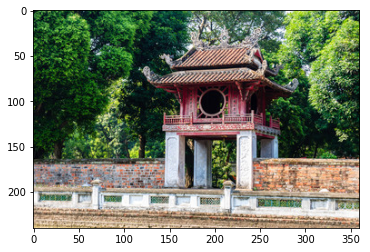

In [66]:
plt.imshow(image)
plt.show()

In [19]:
def convert_to_grey(image):
    red = image[:, :, 0]
    green = image[:, :, 1]
    blue = image[:, :, 2]
    # R*0.299 + G*0.587 + B*0.114 tot cho human vision
    grey_image = red*0.299 + green*0.587 + blue*0.114
    return grey_image

In [20]:
def filter_color_image(kernel, image):
    filtered_image = np.zeros((image.shape[0] - 2, image.shape[1] - 2, image.shape[2]))
    for i in range(filtered_image.shape[0] - 1):
        for j in range(filtered_image.shape[1] - 1):
            for k in range(filtered_image.shape[2]):
                new_value = np.sum(image[i:(i+3), j:(j+3), k] * kernel)
                if new_value < 0:
                    new_value = 0.0
                elif new_value > 1:
                    new_value = 1.0
                filtered_image[i, j, k] = new_value
    return filtered_image

In [21]:
grey_image = convert_to_grey(image)
grey_image.shape

(240, 360)

In [28]:
def filter_grey_image(kernel, image):
    filtered_image = np.zeros((image.shape[0] - 2, image.shape[1] - 2))
    for i in range(filtered_image.shape[0] - 1):
        for j in range(filtered_image.shape[1] - 1):
            new_value = np.sum(image[i:(i+3), j:(j+3)] * kernel)
            if new_value < 0:
                new_value = 0.0
            elif new_value > 1:
                new_value = 1.0
            filtered_image[i, j] = new_value
    return filtered_image

<img style="width:384px; height:573px;" src="../../images/Filters/filter_matrices.png" />

In [23]:
edge_detect_kernel_1 = np.array([[1, 0, -1], 
                                 [0, 0, 0], 
                                 [-1, 0, 1]])
edge_detect_kernel_2 = np.array([[0, 1, 0], 
                                 [1, -4, 1], 
                                 [0, 1, 0]])
edge_detect_kernel_3 = np.array([[-1, -1, -1], 
                                 [-1, 8, -1], 
                                 [-1, -1, -1]])

blur_kernel_1 = np.ones((3, 3))/9.0
blur_kernel_2 = np.array([[1, 2, 1], 
                          [2, 4, 2], 
                          [1, 2, 1]])/16.0

sharpen_kernel = np.array([[0, -1, 0], 
                           [-1, 5, -1], 
                           [0, -1, 0]])

In [58]:
def plot_filter_color_image_1(kernel, image):
    plt.figure(figsize=(7, 3))
    plt.subplot(121)
    plt.imshow(image)
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(filter_color_image(kernel, image))
    plt.axis('off')
    plt.show()
    
def plot_filter_color_image(kernels_dict, image):
    fig = plt.figure(figsize=(8, 24))
    for i, kernel_name in enumerate(sorted(kernels_dict.keys())):
        a=fig.add_subplot(len(kernels_dict), 2, 2*i+1)
        plt.imshow(image)
        a.set_title('Original')
        a.axis('off')
        a=fig.add_subplot(len(kernels_dict), 2, 2*i+2)
        plt.imshow(filter_color_image(kernels_dict[kernel_name], image))
        a.set_title(kernel_name)
        a.axis('off')
    plt.show()
    
def plot_filter_grey_image_1(kernel, image):
    plt.figure(figsize=(7, 3))
    plt.subplot(121)
    plt.imshow(image, cmap='Greys')
    plt.axis('off')
    plt.set_title("original")

    plt.subplot(122)
    plt.imshow(filter_grey_image(kernel, image), cmap='Greys')
    plt.axis('off')
    plt.set_title("filtered")
    plt.show()
    
def plot_filter_grey_image(kernels_dict, image):
    fig = plt.figure(figsize=(8, 24))
    for i, kernel_name in enumerate(sorted(kernels_dict.keys())):
        a=fig.add_subplot(len(kernels_dict), 2, 2*i+1)
        plt.imshow(image, cmap='Greys')
        a.set_title('Original')
        a.axis('off')
        a=fig.add_subplot(len(kernels_dict), 2, 2*i+2)
        plt.imshow(filter_grey_image(kernels_dict[kernel_name], image), cmap='Greys')
        a.set_title(kernel_name)
        a.axis('off')
    plt.show()

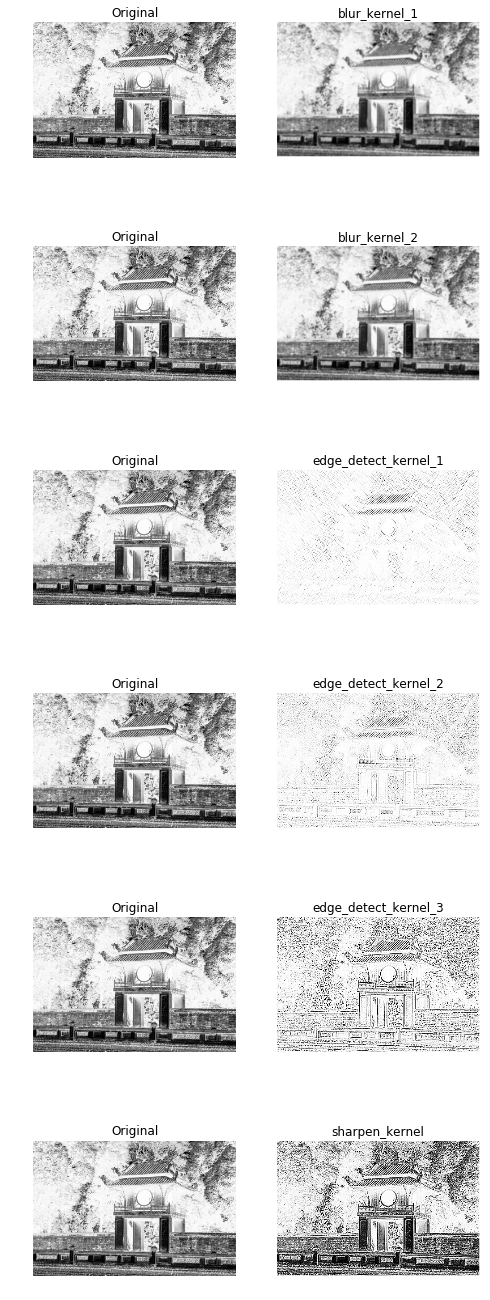

In [57]:
kernels_dict = { "edge_detect_kernel_1": edge_detect_kernel_1, 
                 "edge_detect_kernel_2": edge_detect_kernel_2, 
                 "edge_detect_kernel_3":edge_detect_kernel_3,
                 "blur_kernel_1": blur_kernel_1, 
                 "blur_kernel_2": blur_kernel_2,
                 "sharpen_kernel": sharpen_kernel
               }
plot_filter_grey_image(kernels_dict, grey_image)

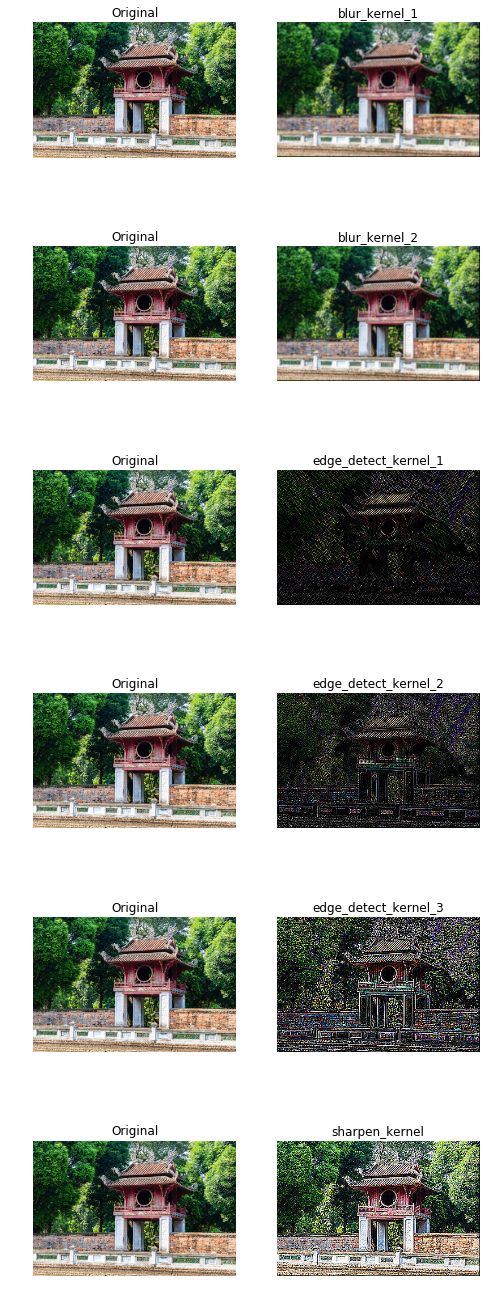

In [59]:
plot_filter_color_image(kernels_dict, image)